In [66]:
import xarray as xr
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

In [3]:
nc_path = '/Users/mohamedsaleh/PhD/wildfires_project/data/Tests/sample_test_hourly/data_0.nc'

In [56]:
ds = xr.open_dataset(nc_path, decode_times=True)

In [57]:
print(ds)

<xarray.Dataset> Size: 75MB
Dimensions:     (valid_time: 168, latitude: 111, longitude: 101)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 1kB 2000-10-01 ... 2000-10-29T23:...
  * latitude    (latitude) float64 888B 60.0 59.9 59.8 59.7 ... 49.2 49.1 49.0
  * longitude   (longitude) float64 808B -120.0 -119.9 -119.8 ... -110.1 -110.0
    expver      (valid_time) <U4 3kB ...
Data variables:
    d2m         (valid_time, latitude, longitude) float32 8MB ...
    t2m         (valid_time, latitude, longitude) float32 8MB ...
    stl1        (valid_time, latitude, longitude) float32 8MB ...
    swvl1       (valid_time, latitude, longitude) float32 8MB ...
    str         (valid_time, latitude, longitude) float32 8MB ...
    u10         (valid_time, latitude, longitude) float32 8MB ...
    v10         (valid_time, latitude, longitude) float32 8MB ...
    tp          (valid_time, latitude, longitude) float32 8MB ...
    lai_hv      (valid_time, latitude, l

In [87]:
lat_mid = len(ds.latitude) // 2 # Select middle latitude index
lon_mid = len(ds.longitude) // 2 # Select middle longitude index
mid_cell = ds.isel(latitude = lat_mid, longitude = lon_mid)  #note isel is for integer counting postions for the grid cells 
mid_cell_one_day = mid_cell.sel(valid_time = "2000-10-01")

In [110]:
print(mid_cell_one_day)

<xarray.Dataset> Size: 2kB
Dimensions:     (valid_time: 24)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 192B 2000-10-01 ... 2000-10-01T23...
    latitude    float64 8B 54.5
    longitude   float64 8B -115.0
    expver      (valid_time) <U4 384B ...
Data variables:
    d2m         (valid_time) float32 96B ...
    t2m         (valid_time) float32 96B ...
    stl1        (valid_time) float32 96B ...
    swvl1       (valid_time) float32 96B ...
    str         (valid_time) float32 96B ...
    u10         (valid_time) float32 96B ...
    v10         (valid_time) float32 96B ...
    tp          (valid_time) float32 96B ...
    lai_hv      (valid_time) float32 96B ...
    lai_lv      (valid_time) float32 96B ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for M

In [111]:
vars_to_check = ["swvl1", "stl1", "str", "lai_hv", "lai_lv"]

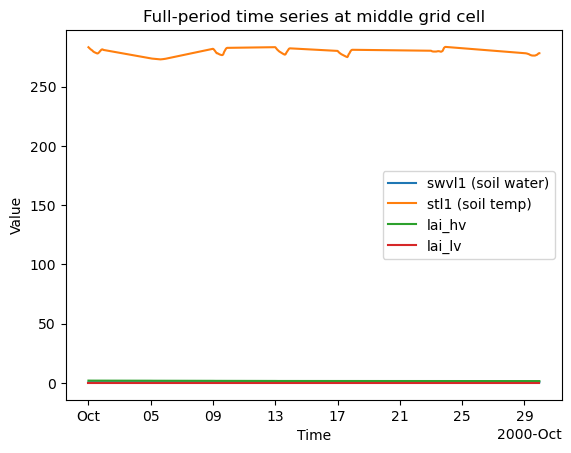

<Figure size 1000x1000 with 0 Axes>

In [112]:
fig, ax = plt.subplots()
plt.figure(figsize=(10,10))
mid_cell["swvl1"].plot(ax=ax, label="swvl1 (soil water)")
mid_cell["stl1"].plot(ax=ax, label="stl1 (soil temp)")
# LAI may be constant, but we plot it too:
mid_cell["lai_hv"].plot(ax=ax, label="lai_hv")
mid_cell["lai_lv"].plot(ax=ax, label="lai_lv")

ax.set_title("Full-period time series at middle grid cell")
ax.set_xlabel("Time")
ax.set_ylabel("Value")
ax.legend()
plt.show()

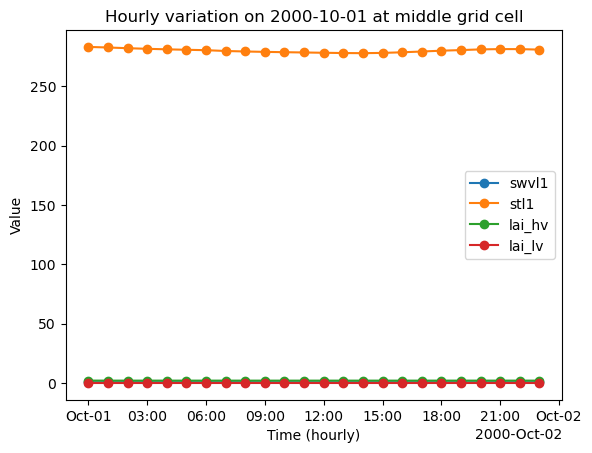

In [113]:
# 4. Now: only ONE DAY (e.g., 2000-10-01) at that cell
mid_cell_one_day = mid_cell.sel(valid_time="2000-10-01")

fig, ax = plt.subplots()

mid_cell_one_day["swvl1"].plot(ax=ax, marker="o", label="swvl1")
mid_cell_one_day["stl1"].plot(ax=ax, marker="o", label="stl1")
mid_cell_one_day["lai_hv"].plot(ax=ax, marker="o", label="lai_hv")
mid_cell_one_day["lai_lv"].plot(ax=ax, marker="o", label="lai_lv")

ax.set_title("Hourly variation on 2000-10-01 at middle grid cell")
ax.set_xlabel("Time (hourly)")
ax.set_ylabel("Value")
ax.legend()
plt.show()